In [8]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from math import log
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib as mpl
from PIL import Image

# Download the punkt and stopwords from nltk
nltk.download('stopwords')
nltk.download('punkt')

# Get the stop words and punkt from nltk
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/emdoehring/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/emdoehring/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
# load in file
df = pd.read_csv('Danny Brown Lyrics.csv', index_col=0)
df['Lyrics_str'] = df['Lyrics'].astype(str)
df.head()

,Artist,Album,Release Date,Lyrics,Lyrics_str
XXX,Danny Brown,XXX,"{'year': 2011, 'month': 8, 'day': 15}",\nCheck\n\nColder than them grits they fed sla...,\nCheck\n\nColder than them grits they fed sla...
Really Doe,Danny Brown,Atrocity Exhibition,"{'year': 2016, 'month': 9, 'day': 18}",You niggas dont even know\nAll that talk then ...,You niggas dont even know\nAll that talk then ...
Ain’t It Funny,Danny Brown,Atrocity Exhibition,"{'year': 2016, 'month': 9, 'day': 27}","Verbal couture, parkour with the metaphors\nTh...","Verbal couture, parkour with the metaphors\nTh..."
I Will,Danny Brown,XXX,"{'year': 2011, 'month': 8, 'day': 15}","Put a cup up, put a four up in it\nSixes on th...","Put a cup up, put a four up in it\nSixes on th..."
Monopoly,Danny Brown,XXX,"{'year': 2011, 'month': 8, 'day': 15}","Ain't gonna be too many suckers, and furthermo...","Ain't gonna be too many suckers, and furthermo..."


In [14]:
import os 
import pandas as pd
import numpy as np

# regular expression import
import re

# uni-code library
import unicodedata

# natural language toolkit library/modules
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

def basic_clean(string):
    '''
    This function takes in a string and
    returns the string normalized.
    '''
    string = unicodedata.normalize('NFKD', string)\
             .encode('ascii', 'ignore')\
             .decode('utf-8', 'ignore')
    string = re.sub(r'[^\w\s]', '', string).lower()
    return string

def stem(string):
    '''
    This function takes in a string and
    returns a string with words stemmed.
    '''
    # Create porter stemmer.
    ps = nltk.porter.PorterStemmer()
    
    # Use the stemmer to stem each word in the list of words we created by using split.
    stems = [ps.stem(word) for word in string.split()]
    
    # Join our lists of words into a string again and assign to a variable.
    string = ' '.join(stems)
    
    return string

def lemmatize(string):
    '''
    This function takes in string for and
    returns a string with words lemmatized.
    '''
    # Create the lemmatizer.
    wnl = nltk.stem.WordNetLemmatizer()

    # Use the lemmatizer on each word in the list of words we created by using split.
    lemmas = [wnl.lemmatize(word) for word in string.split()]

    # Join our list of words into a string again and assign to a variable.
    string = ' '.join(lemmas)
    
    return string

def remove_stopwords(string, extra_words = [], exclude_words = []):
    '''
    This function takes in a string, optional extra_words and exclude_words parameters
    with default empty lists and returns a string.
    '''
    # Create stopword_list.
    stopword_list = stopwords.words('english')
    
    # Remove 'exclude_words' from stopword_list to keep these in my text.
    stopword_list = set(stopword_list) - set(exclude_words)
    
    # Add in 'extra_words' to stopword_list.
    stopword_list = stopword_list.union(set(extra_words))

    # Tokenize string.
    words = word_tokenize(string)
    
    # Create a list of words from my string with stopwords removed and assign to variable.
    filtered_words = [word for word in words if word not in stopword_list]
    
    # Join words in the list back into strings and assign to a variable.
    string_without_stopwords = ' '.join(filtered_words)
    
    return string_without_stopwords

def clean(text):
    '''
    This function combines the above steps and added extra stop words to clean text
    '''
    return remove_stopwords(lemmatize(basic_clean(text)), extra_words = ['dont', 'cant', 'im', 'ive', 'ill', 'te', 'youre', 'wan', 'na', 'wa', 
                                                                        'thats', 'wont', 'aint', 'gon', 'ta'])

texts = df['Lyrics_str']
    
cleaned_texts = [clean(text) for text in texts]

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(cleaned_texts)

# Get feature names (words)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Convert TF-IDF matrix to a dictionary
word_tfidf = dict(zip(feature_names, tfidf_matrix.mean(axis=0).tolist()[0]))
print(word_tfidf)

{'aaah': 0.00023736674283899003, 'aap': 0.00032590342244587613, 'abandoned': 0.0012288407575569281, 'abercrombie': 0.0004273427430892865, 'aboard': 0.0003220563582302724, 'abortion': 0.0014736991009781258, 'absent': 0.00021756500642768203, 'absentee': 0.0004355127188331257, 'absorb': 0.0004096874603243833, 'abu': 0.00019135816168486253, 'abuse': 0.0010328673520643588, 'abused': 0.00040756496427443316, 'ac': 0.0006113025613337269, 'academy': 0.0006731633476658892, 'accurate': 0.0004048193650054137, 'ace': 0.001661960537452341, 'acg': 0.0005580882691135446, 'acoustic': 0.0008781339023901006, 'acre': 0.00046039024366351794, 'acronym': 0.0003043831496081206, 'across': 0.0012802248146384118, 'act': 0.00460582425340077, 'actavis': 0.0005126068181567928, 'actin': 0.00113389067395645, 'acting': 0.0029007109010077813, 'action': 0.0016504047453417435, 'activator': 0.00018680000081742416, 'activist': 0.00020997563192570916, 'actual': 0.0015401922225406798, 'actuality': 0.0002914793075084779, 'act

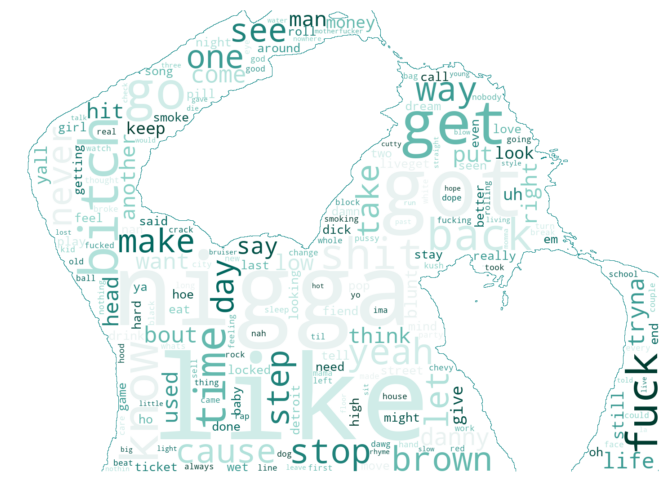

In [17]:
### colormap
# import the desired colormap from matplotlib
cmap = mpl.cm.BrBG(np.linspace(0,1,20)) 
# the darker part of the matrix is selected for readability
cmap = mpl.colors.ListedColormap(cmap[-10:,:-1]) 

# open the image and use np.array to transform the file to an array
cand_mask=np.array(Image.open('dannybrown.png'))

# this line will take all values greater than 3 and make them 255 (white)
# if they are less than 3, they will be whatever value they are in the array
cand_mask=np.where(cand_mask > 3, 255, cand_mask)


#create and generate our wordcloud object
wordcloud = WordCloud(background_color='white',
                      contour_color='teal',
                      mask=cand_mask, 
                      colormap=cmap,
                      contour_width=0.5).generate_from_frequencies(word_tfidf)


#plot
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()